In [5]:
# imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark')

from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

import os
import sys

In [93]:
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.modeling import modeling_functions as mf

## Load the consensus dataframe

In [3]:
df = pd.read_csv('../asp_original')

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,waterfrontpoorqualtiy,waterfrontrestrictedaccess,waterfrontaccessrights,waterfrontproximityinfluence,tidelandshoreland,lotdepthfactopr,trafficnoise,airportnoise,powerlines,othernuisances
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,0,0,0,N,N,0.0,0,0,0,N
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,0,0,0,N,N,0.0,0,1,0,N
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,0,0,0,N,N,0.0,0,1,0,N
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,0,0,0,N,N,0.0,0,1,0,N
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,0,0,0,N,N,0.0,0,0,0,N


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 64 columns):
documentdate                    18182 non-null object
saleprice                       18182 non-null float64
propertytype                    18182 non-null int64
principaluse                    18182 non-null int64
saleinstrument                  18182 non-null int64
currentuseland                  18182 non-null object
historicproperty                18182 non-null object
salereason                      18182 non-null int64
propertyclass                   18182 non-null int64
zipcode                         15815 non-null float64
streettype                      18182 non-null object
stories                         18182 non-null float64
buildinggrade                   18182 non-null int64
squarefeettotalliving           18182 non-null int64
squarefeettotalbasement         18182 non-null int64
squarefeetgarageattached        18182 non-null float64
squarefeetopenporch            

In [7]:
# How many columns are in the dataset?
len(df.columns)

64

In [8]:
# Check for duplicate entries
df.duplicated().sum()

77

In [9]:
# look into what these duplicates are:

In [10]:
df[df.duplicated()]

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,waterfrontpoorqualtiy,waterfrontrestrictedaccess,waterfrontaccessrights,waterfrontproximityinfluence,tidelandshoreland,lotdepthfactopr,trafficnoise,airportnoise,powerlines,othernuisances
221,2019-08-28,1450000.0,11,6,3,N,N,1,8,NaN,...,0,0,0,N,N,0.0,0,0,0,N
236,2019-04-05,512500.0,11,6,3,N,N,1,8,98133.0,...,0,0,0,N,N,0.0,0,2,0,N
807,2019-06-18,1198000.0,11,6,3,N,N,1,8,98075.0,...,0,0,0,N,N,0.0,0,0,0,N
815,2019-08-26,975000.0,11,6,3,N,N,1,8,98115.0,...,0,0,0,N,N,0.0,0,0,0,N
960,2019-06-05,1075000.0,11,6,3,N,N,1,8,98033.0,...,0,0,0,N,N,0.0,0,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,2019-09-13,899000.0,11,6,3,N,N,1,8,98092.0,...,0,0,0,N,N,0.0,0,0,0,N
17188,2019-08-14,630000.0,11,6,3,N,N,1,8,NaN,...,0,0,0,N,N,0.0,0,0,0,N
17469,2019-07-31,1270000.0,11,6,3,N,N,1,8,NaN,...,0,0,0,N,N,0.0,0,0,0,N
17602,2019-03-21,1490000.0,11,6,3,N,N,1,8,NaN,...,0,0,0,N,N,0.0,0,0,0,N


It's not clear what these duplicates are duplicates of - there's no index so how do we know they're duplicates?  We'll leave them in since they don't appear to be duplicates.

In [11]:
# Check for na's (just look to get an idea; don't drop or impute yet)
df['zipcode'].isna().sum()

2367

So we see that there are 2367 entries with no zipcode.  I don't think we care too much about zipcode just yet so we will leave those values in htere. 

I noticed above that `documentdate` was an object, not datetime object so we change that now:

In [12]:
df['documentdate'] = pd.to_datetime(df['documentdate'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 64 columns):
documentdate                    18182 non-null datetime64[ns]
saleprice                       18182 non-null float64
propertytype                    18182 non-null int64
principaluse                    18182 non-null int64
saleinstrument                  18182 non-null int64
currentuseland                  18182 non-null object
historicproperty                18182 non-null object
salereason                      18182 non-null int64
propertyclass                   18182 non-null int64
zipcode                         15815 non-null float64
streettype                      18182 non-null object
stories                         18182 non-null float64
buildinggrade                   18182 non-null int64
squarefeettotalliving           18182 non-null int64
squarefeettotalbasement         18182 non-null int64
squarefeetgarageattached        18182 non-null float64
squarefeetopenporch    

### Visualise Target Variable:  `saleprice`

## ADD X-AXIS LABEL FOR HIST AND Y LABEL.  USE LESS Y-LABEL TICKS AND MAKE TICK VALUES BIGGER.

In [3]:
import matplotlib.pyplot as plt


NameError: name 'df' is not defined

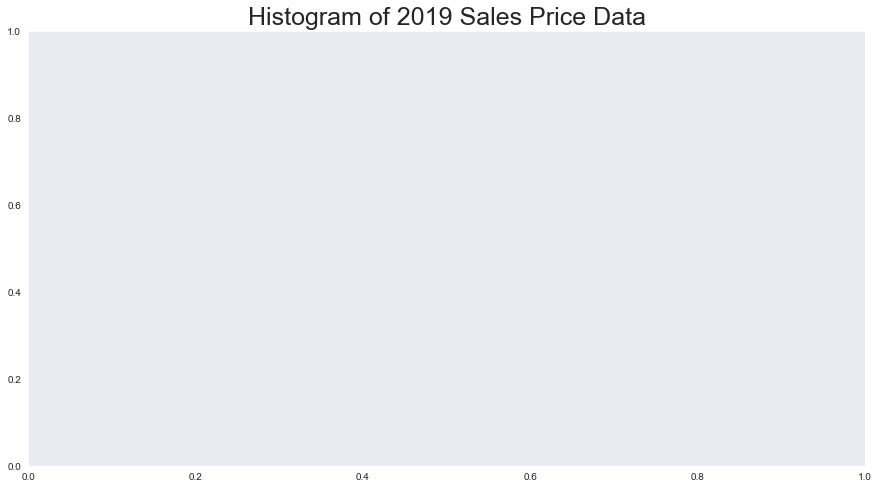

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Histogram of 2019 Sales Price Data', fontsize = 25)
sns.distplot(df.saleprice, ax = ax, axlabel = "")
# ax[1].set_title('Boxplot of 2019 Sales Price Data', fontsize = 20)
# sns.boxplot(df.saleprice, ax= ax[1])
ax.tick_params(axis='both', labelsize=20)
# ax[1].tick_params(axis='both', labelsize=12)
plt.xlabel('Sale Price', fontsize = 20)
plt.tight_layout()

## Explore Correlations:

Here I'm looking for variables that are highly correlated with the target variable, but not highly correlated with other input variables.

In [15]:
# create a correlation matrix
df.corr()

,saleprice,propertytype,principaluse,saleinstrument,salereason,propertyclass,zipcode,stories,buildinggrade,squarefeettotalliving,...,waterfrontlocation,waterfrontfootage,waterfrontbank,waterfrontpoorqualtiy,waterfrontrestrictedaccess,waterfrontaccessrights,lotdepthfactopr,trafficnoise,airportnoise,powerlines
saleprice,1.000000,-0.009289,NaN,0.019072,-0.019870,-0.033387,-0.035166,0.291290,0.616371,0.596841,...,0.057722,0.078874,0.045279,0.078484,-0.000028,0.030727,0.085101,0.043391,0.005926,NaN
propertytype,-0.009289,1.000000,NaN,0.003744,-0.000966,-0.009551,0.002566,0.061270,-0.003994,-0.042931,...,-0.006389,-0.007703,-0.004999,-0.007456,-0.001932,-0.004049,-0.002845,-0.001795,0.025912,NaN
principaluse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saleinstrument,0.019072,0.003744,NaN,1.000000,-0.258000,-0.003369,-0.000258,0.011049,0.011778,-0.001286,...,0.002820,0.004036,0.002447,0.003768,0.000853,0.001787,0.002523,0.000792,-0.007598,NaN
salereason,-0.019870,-0.000966,NaN,-0.258000,1.000000,0.000869,-0.000312,-0.000972,-0.010860,-0.005156,...,-0.000728,-0.001041,-0.000631,-0.000972,-0.000220,-0.000461,-0.000651,-0.000204,0.034825,NaN
propertyclass,-0.033387,-0.009551,NaN,-0.003369,0.000869,1.000000,-0.001594,-0.033011,0.002954,0.025811,...,-0.002166,0.008226,0.004987,0.007680,0.001739,0.003644,0.005142,0.001615,-0.012777,NaN
zipcode,-0.035166,0.002566,NaN,-0.000258,-0.000312,-0.001594,1.000000,-0.011672,-0.023614,-0.034323,...,-0.000871,-0.000640,0.000167,0.000752,-0.000289,0.000790,0.002324,0.001041,0.008853,NaN
stories,0.291290,0.061270,NaN,0.011049,-0.000972,-0.033011,-0.011672,1.000000,0.447522,0.350447,...,0.004944,-0.008132,-0.008596,-0.010394,-0.016035,-0.009700,-0.006152,0.014088,-0.002612,NaN
buildinggrade,0.616371,-0.003994,NaN,0.011778,-0.010860,0.002954,-0.023614,0.447522,1.000000,0.709274,...,0.047023,0.004425,-0.001804,0.003885,-0.014390,-0.006937,0.003369,0.000432,-0.057989,NaN
squarefeettotalliving,0.596841,-0.042931,NaN,-0.001286,-0.005156,0.025811,-0.034323,0.350447,0.709274,1.000000,...,0.047343,0.021053,0.010696,0.019373,-0.004858,0.008679,0.001530,0.001567,-0.065718,NaN


This is not easy to analyse so we try with a heatmap:

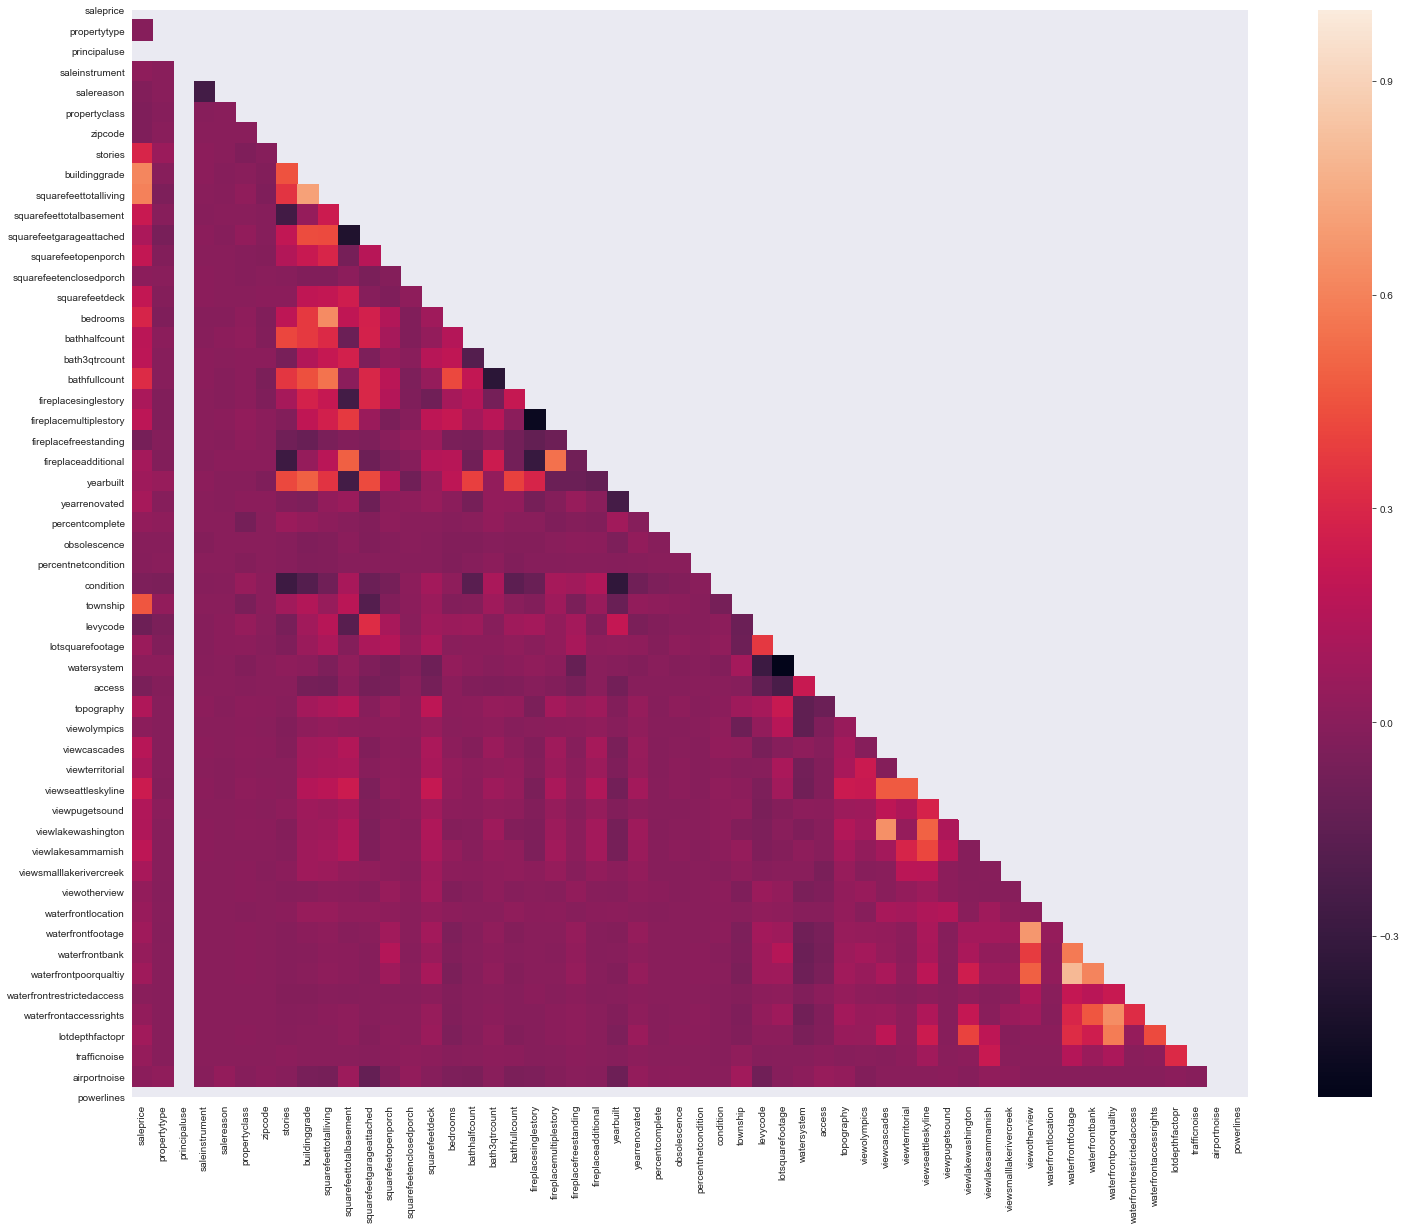

In [16]:
# Then pass the above code into Seaborn's heatmap plot
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(df.corr(), mask=mask);

Return the features that have a correlation with `saleprice` greater than 0.3:

In [17]:
df_corr = df.corr()

# inspect all the correlations with 'saleprice' in descedning order so we can see highest correlations
sorted_corrs = df_corr['saleprice'].sort_values(ascending = False)
sorted_corrs

saleprice                     1.000000
buildinggrade                 0.616371
squarefeettotalliving         0.596841
township                      0.460482
bathfullcount                 0.314990
stories                       0.291290
bedrooms                      0.285509
viewseattleskyline            0.241013
squarefeettotalbasement       0.225156
squarefeetopenporch           0.206762
squarefeetdeck                0.202800
viewlakesammamish             0.186913
fireplacemultiplestory        0.182270
bath3qtrcount                 0.178428
bathhalfcount                 0.175342
viewcascades                  0.160079
viewpugetsound                0.139496
topography                    0.135018
viewlakewashington            0.133095
squarefeetgarageattached      0.117777
viewterritorial               0.116188
fireplacesinglestory          0.114337
viewsmalllakerivercreek       0.108344
yearrenovated                 0.101951
fireplaceadditional           0.094298
lotdepthfactopr          

In [18]:
high_corrs = sorted_corrs[sorted_corrs > 0.3]
high_corrs

saleprice                1.000000
buildinggrade            0.616371
squarefeettotalliving    0.596841
township                 0.460482
bathfullcount            0.314990
Name: saleprice, dtype: float64

So, for our first model, we will look at starting with these features.

### Inspecting high correlation features:

#### Building Grade:

In [19]:
# checkout building grade unique values and type:
df['buildinggrade'].unique()

array([ 8,  7,  6, 10,  9, 11,  5, 12,  4,  1,  3])

In [20]:
# look up these building codes:
codes = pd.read_csv('../EXTR_LookUp.csv')
codes[codes['LUType'] == 82]

,LUType,LUItem,LUDescription
1150,82,1,1 Cabin ...
1151,82,10,10 Very Good ...
1152,82,11,11 Excellent ...
1153,82,12,12 Luxury ...
1154,82,13,13 Mansion ...
1155,82,2,2 Substandard ...
1156,82,20,Exceptional Properties ...
1157,82,3,3 Poor ...
1158,82,4,4 Low ...
1159,82,5,5 Fair ...


So building grade is a categorical variable.  Let's change it to this type:

In [21]:
# change type:
df['buildinggrade'] = df['buildinggrade'].astype('category')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 64 columns):
documentdate                    18182 non-null datetime64[ns]
saleprice                       18182 non-null float64
propertytype                    18182 non-null int64
principaluse                    18182 non-null int64
saleinstrument                  18182 non-null int64
currentuseland                  18182 non-null object
historicproperty                18182 non-null object
salereason                      18182 non-null int64
propertyclass                   18182 non-null int64
zipcode                         15815 non-null float64
streettype                      18182 non-null object
stories                         18182 non-null float64
buildinggrade                   18182 non-null category
squarefeettotalliving           18182 non-null int64
squarefeettotalbasement         18182 non-null int64
squarefeetgarageattached        18182 non-null float64
squarefeetopenporch 

When we isolate down to our features, we will dummy this variable out. 

Let's see if `buildinggrade` and `saleprice` have a linear relationship visually:

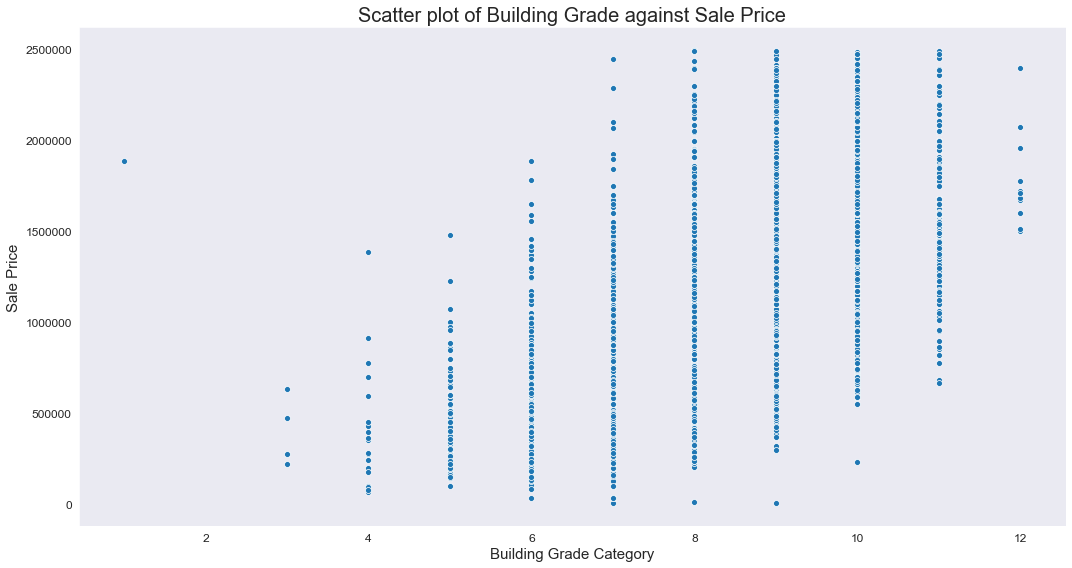

In [31]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'buildinggrade', y = 'saleprice', data = df);
ax.set_title('Scatter plot of Building Grade against Sale Price', fontsize = 20)
ax.tick_params(axis='both', labelsize=12)
plt.xlabel('Building Grade Category', fontsize = 15)
plt.ylabel('Sale Price', fontsize = 15)
plt.tight_layout()

Since this is a categorical variable, it is more difficult to notice the relationship but there is somewhat of an upward trend in this data, that as building grade increases, sale price seems to also increase.

#### Total Living Sqft:

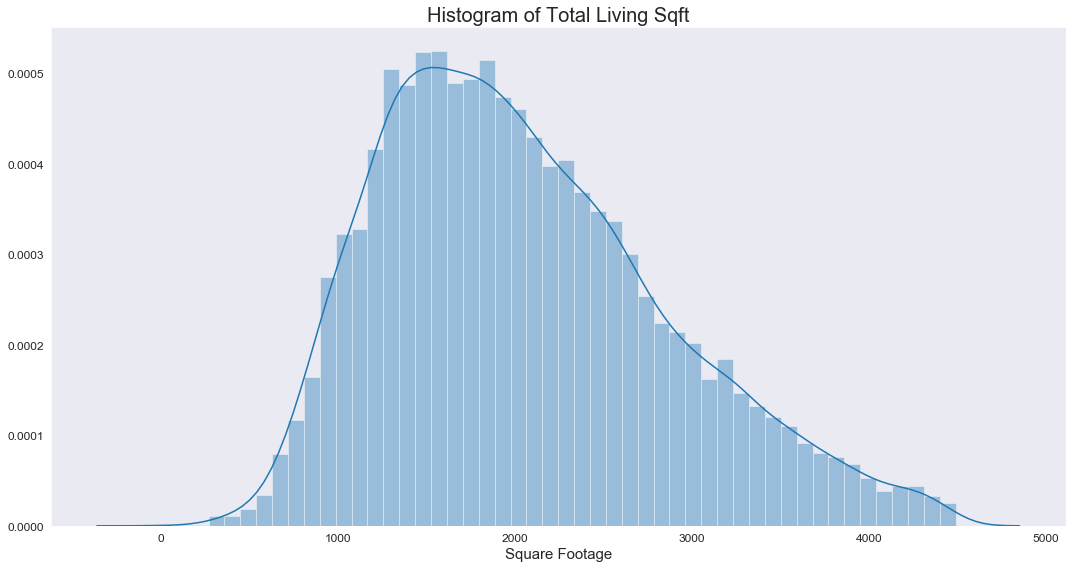

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Histogram of Total Living Sqft', fontsize = 20)
sns.distplot(df.squarefeettotalliving, ax = ax, axlabel = "")
ax.tick_params(axis='both', labelsize=12)
plt.xlabel('Square Footage', fontsize = 15)
plt.tight_layout()

The data looks slightly right skewed, but overall it looks some-what normal.  

In [25]:
# summary statistics:
df.squarefeettotalliving.describe()

count    18182.000000
mean      2051.980420
std        807.581704
min          2.000000
25%       1440.000000
50%       1930.000000
75%       2550.000000
max       4490.000000
Name: squarefeettotalliving, dtype: float64

We might think about log transforming this feature to help with skewness in future models.

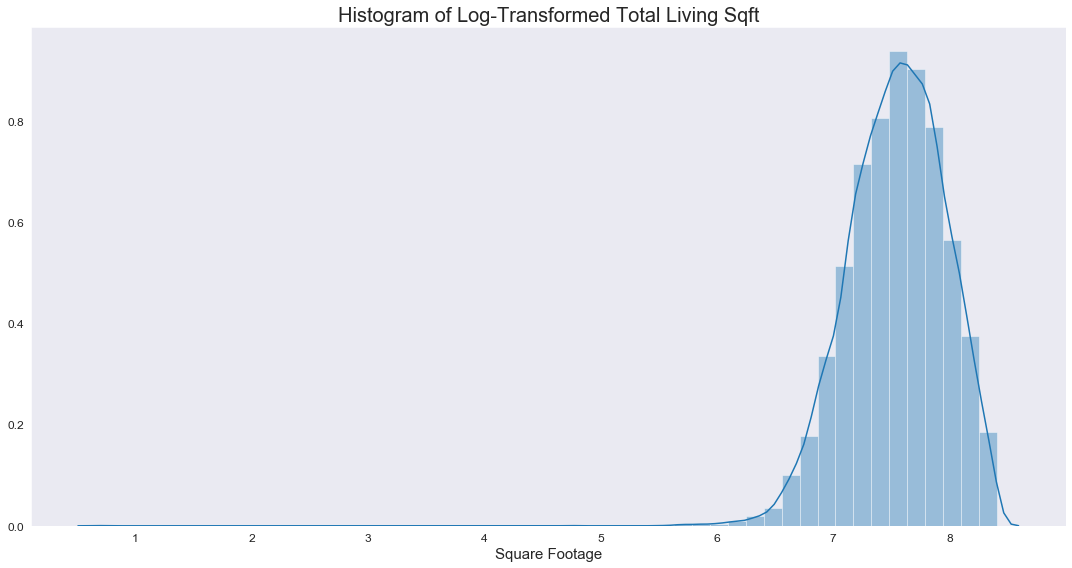

In [26]:
# data[feat].map(lambda x: np.log(x))
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Histogram of Log-Transformed Total Living Sqft', fontsize = 20)
sns.distplot(np.log(df.squarefeettotalliving), ax = ax, axlabel = "")
ax.tick_params(axis='both', labelsize=12)
plt.xlabel('Square Footage', fontsize = 15)
plt.tight_layout()

In [27]:
np.log(df.squarefeettotalliving).describe()

count    18182.000000
mean         7.545715
std          0.415034
min          0.693147
25%          7.272398
50%          7.565275
75%          7.843849
max          8.409608
Name: squarefeettotalliving, dtype: float64

Now it looks left skewed - think about other ways we could transform in future models.

Let's also check the linearity:

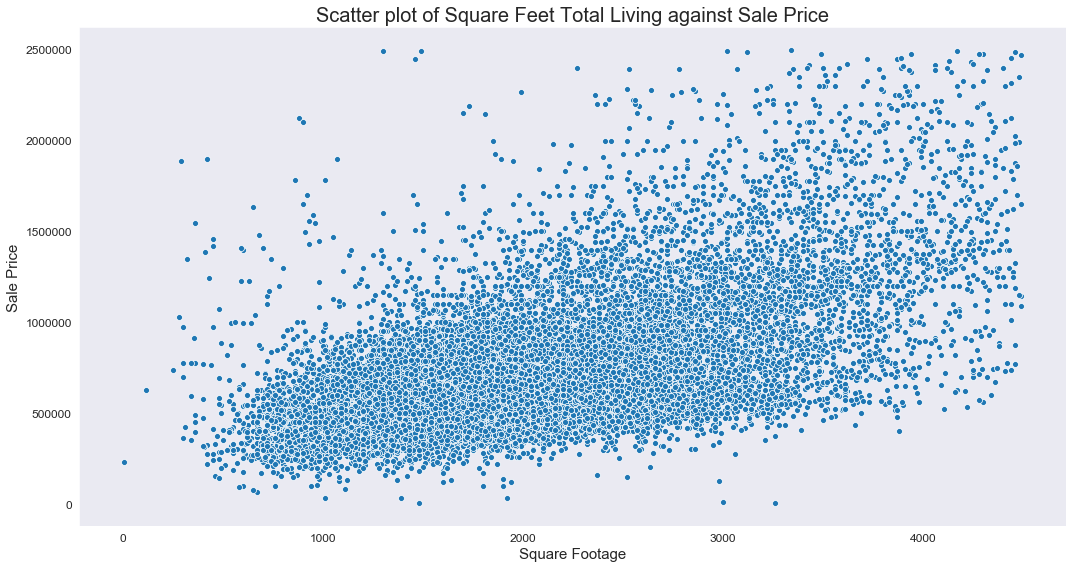

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'squarefeettotalliving', y = 'saleprice', data = df);
ax.set_title('Scatter plot of Square Feet Total Living against Sale Price', fontsize = 20)
ax.tick_params(axis='both', labelsize=12)
plt.xlabel('Square Footage', fontsize = 15)
plt.ylabel('Sale Price', fontsize = 15)
plt.tight_layout()

This seems somewhat linear thought there is a fair amount of variability. 

#### Township:

In [38]:
# checkout unique values:
df['township'].unique()

array([25., 26., 24., 22., 21., 23., 20., 19.])

In [42]:
df['township']

0        25.0
1        26.0
2        26.0
3        26.0
4        24.0
         ... 
18177    24.0
18178    22.0
18179    23.0
18180    25.0
18181    23.0
Name: township, Length: 18182, dtype: float64

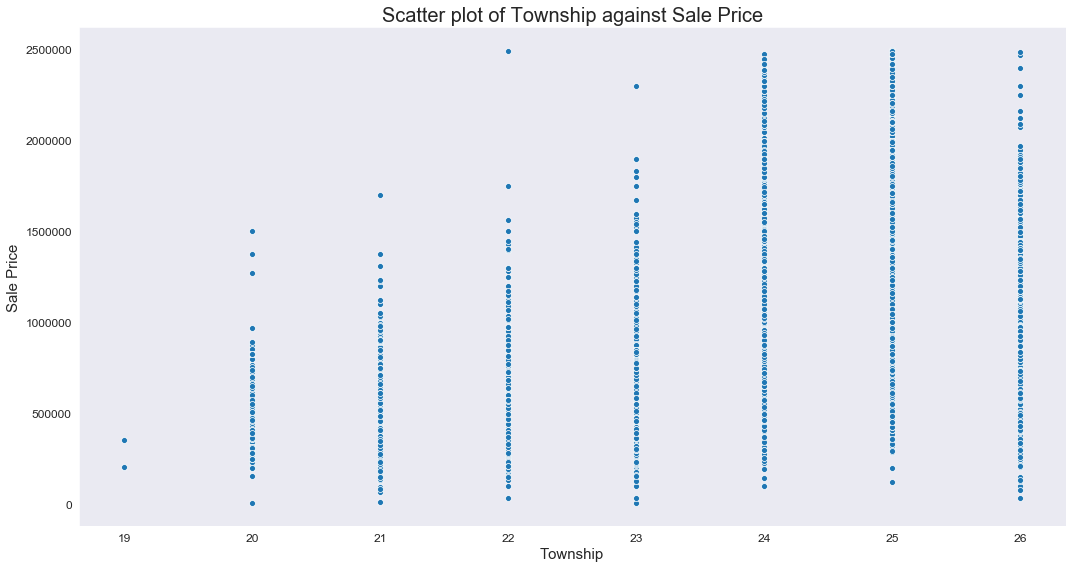

In [46]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'township', y = 'saleprice', data = df);
ax.set_title('Scatter plot of Township against Sale Price', fontsize = 20)
ax.tick_params(axis='both', labelsize=12)
plt.xlabel('Township', fontsize = 15)
plt.ylabel('Sale Price', fontsize = 15)
plt.tight_layout()

So `township` is a float value but only has 8 unique values.  There are no lookup codes for this feature.  It seems more reasonable that this is actually a categorical variable than a float so I'll change the type...

In [47]:
# change type:
df['township'] = df['township'].astype('category')

I don't think this one would be worth modeling since there isn't a hugely strong linear relationship and I don't think it tells us much useful information for first time home buyers. 

#### Full bath count:

Thinking about how bathrooms are counted, it doesn't make sense for only full baths to correlate with sale price.  Rather we should look at the total bathroom count.  

Bathrooms in real estate are defined as:
- A quarter bath is considered a bathroom with just a toilet
- A half bath is considered a bathroom with only a toilet and shower
- A 3/4 bath is considered a bathroom with a toilet and shower/tub
- A full bath is considered a bathroom with a toilet, shower and seperate tub. 

With this in mind, the columns for `bathhalfcount` etc would probably contain counts of the number of 'half', 'quarter' etc baths in them.  Thus, we could find the total bath count by multiplying the corresponding bath size by the number of that size and adding them together.  Let's make sure my assumption of these collumns is correct:

In [49]:
df['bathfullcount'].unique()

array([2, 3, 1, 0, 4, 5])

In [50]:
df['bathhalfcount'].unique()

array([0, 3, 1, 2, 4])

In [51]:
df['bath3qtrcount'].unique()

array([1, 0, 2, 3, 4, 5])

My assumption is correct that it counts the number of bathrooms of that type.  So let's create a new column `bathtotcount` that has the total bathroom count for a house:

In [52]:
df['bathtotcount'] = df['bathfullcount'] + (0.5 * df['bathhalfcount']) + (0.75 * df['bath3qtrcount'])

In [53]:
df['bathtotcount'].unique()

array([2.75, 4.5 , 1.75, 2.5 , 1.  , 2.25, 2.  , 3.  , 1.5 , 3.5 , 0.75,
       3.25, 4.  , 3.75, 5.25, 4.75, 4.25, 0.  , 1.25, 5.  , 5.5 , 5.75,
       6.25, 0.5 ])

Now let's see if **this** bathroom count is linear with `saleprice`:

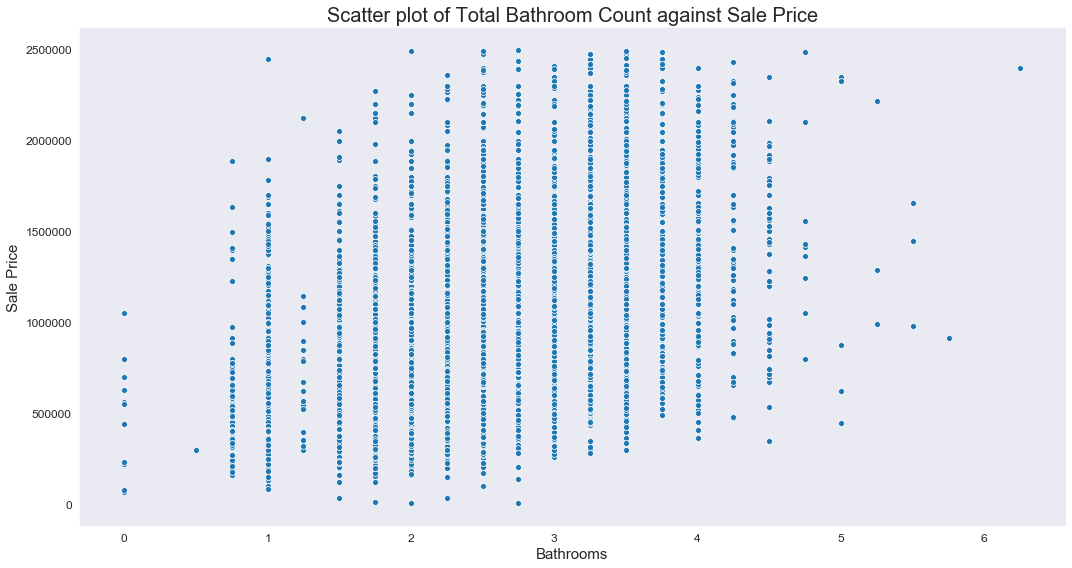

In [54]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'bathtotcount', y = 'saleprice', data = df);
ax.set_title('Scatter plot of Total Bathroom Count against Sale Price', fontsize = 20)
ax.tick_params(axis='both', labelsize=12)
plt.xlabel('Bathrooms', fontsize = 15)
plt.ylabel('Sale Price', fontsize = 15)
plt.tight_layout()

There is definitely a notable upward trend although the data is spread out.

Let's also inspect the new correlation value:

In [60]:
new_df_corr = df.corr()

# inspect all the correlations with 'saleprice' in descedning order so we can see highest correlations
sorted_corrs = new_df_corr['saleprice'].sort_values(ascending = False)
sorted_corrs

saleprice                     1.000000
squarefeettotalliving         0.596841
bathtotcount                  0.462561
bathfullcount                 0.314990
stories                       0.291290
bedrooms                      0.285509
viewseattleskyline            0.241013
squarefeettotalbasement       0.225156
squarefeetopenporch           0.206762
squarefeetdeck                0.202800
viewlakesammamish             0.186913
fireplacemultiplestory        0.182270
bath3qtrcount                 0.178428
bathhalfcount                 0.175342
viewcascades                  0.160079
viewpugetsound                0.139496
topography                    0.135018
viewlakewashington            0.133095
squarefeetgarageattached      0.117777
viewterritorial               0.116188
fireplacesinglestory          0.114337
viewsmalllakerivercreek       0.108344
yearrenovated                 0.101951
fireplaceadditional           0.094298
lotdepthfactopr               0.085101
waterfrontfootage        

In [61]:
high_corrs = sorted_corrs[sorted_corrs > 0.3]
high_corrs

saleprice                1.000000
squarefeettotalliving    0.596841
bathtotcount             0.462561
bathfullcount            0.314990
Name: saleprice, dtype: float64

`bathtotcount` is now the 2nd highest correlation with `saleprice`.  Notice `buildinggrade` and `township` have been taken out of the correlation here since we changed them to categorical variables.  This isn't to say we won't use them but it's becoming clear that bathroom count and squarefootage seem more meaningful.

Let's plot the bathroom count data:

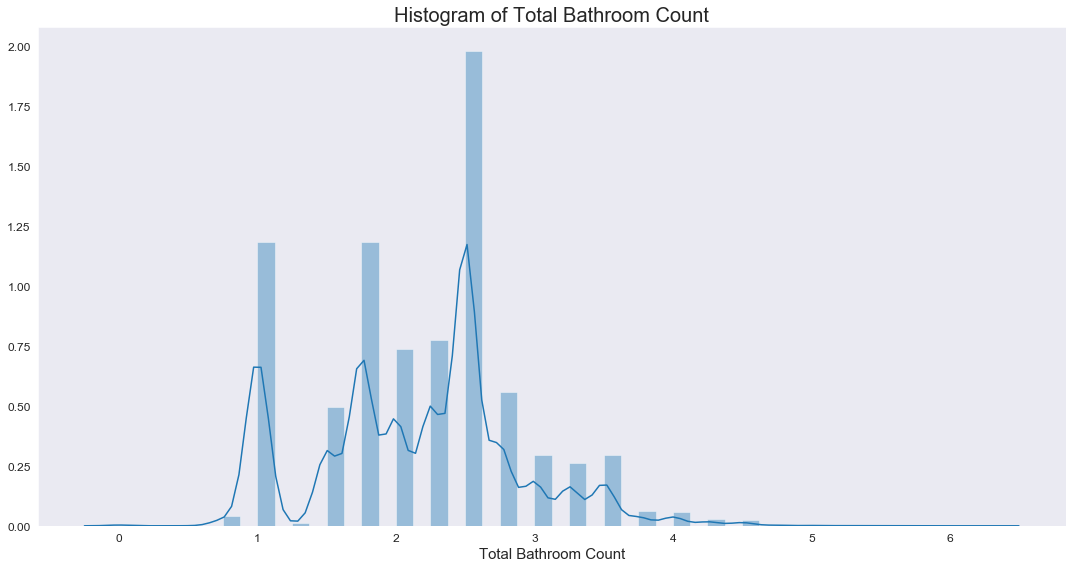

In [62]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Histogram of Total Bathroom Count', fontsize = 20)
sns.distplot(df.bathtotcount, ax = ax, axlabel = "")
ax.tick_params(axis='both', labelsize=12)
plt.xlabel('Total Bathroom Count', fontsize = 15)
plt.tight_layout()

As expected, this doesn't look too normal but it does have a general arching shape.  We can't log transform this data since we have 0 values.  We could eliminate the 0's since we probably only want to focus on houses with more than 0 bathrooms.

Let's see how much data we'd loose if we filtered these houses out:

In [64]:
df.shape

(18182, 65)

In [66]:
df[df['bathtotcount'] > 0].shape

(18170, 65)

So we'd only lose 12 entries, so I'm happy to drop these entries:

In [67]:
df = df[df['bathtotcount'] > 0]

In [70]:
df.shape

(18170, 65)

Let's look at the data again now:

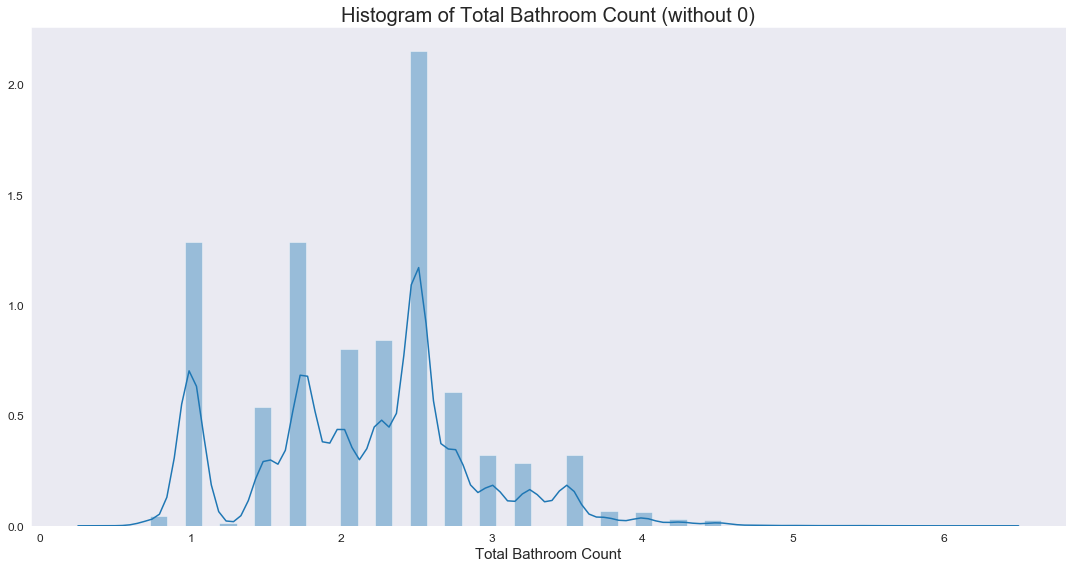

In [72]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Histogram of Total Bathroom Count (without 0)', fontsize = 20)
sns.distplot(df.bathtotcount, ax = ax, axlabel = "")
ax.tick_params(axis='both', labelsize=12)
plt.xlabel('Total Bathroom Count', fontsize = 15)
plt.tight_layout()

Let's compare with log-transformed data:

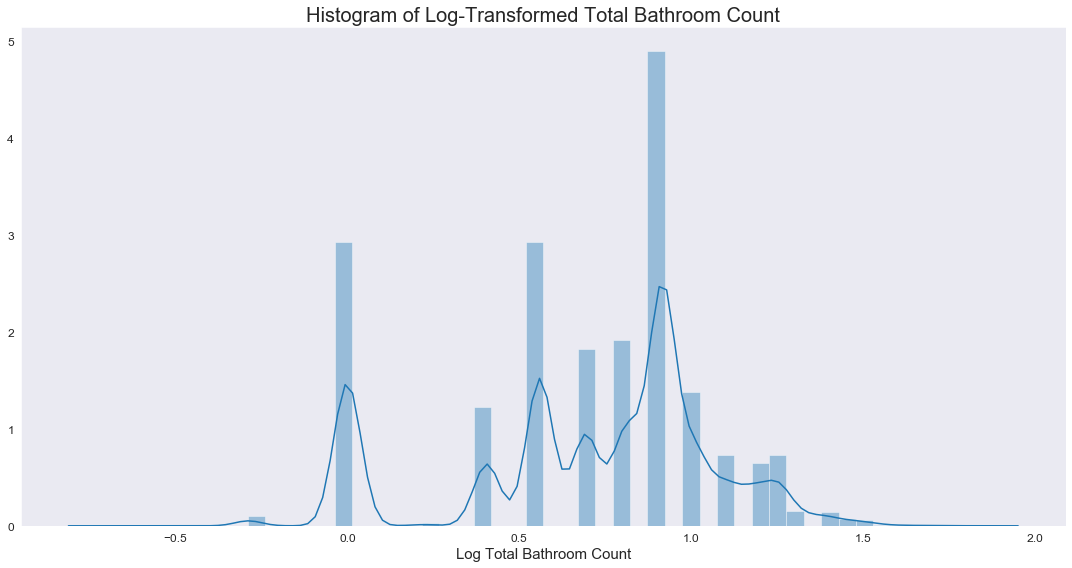

In [73]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Histogram of Log-Transformed Total Bathroom Count', fontsize = 20)
sns.distplot(np.log(df.bathtotcount), ax = ax, axlabel = "")
ax.tick_params(axis='both', labelsize=12)
plt.xlabel('Log Total Bathroom Count', fontsize = 15)
plt.tight_layout()

It seems to make the data worse.  Before we spend to much time on transformations we'll leave the data like this and move onto our model.

### Summaries Features with Scatter Plot with Sales Price:

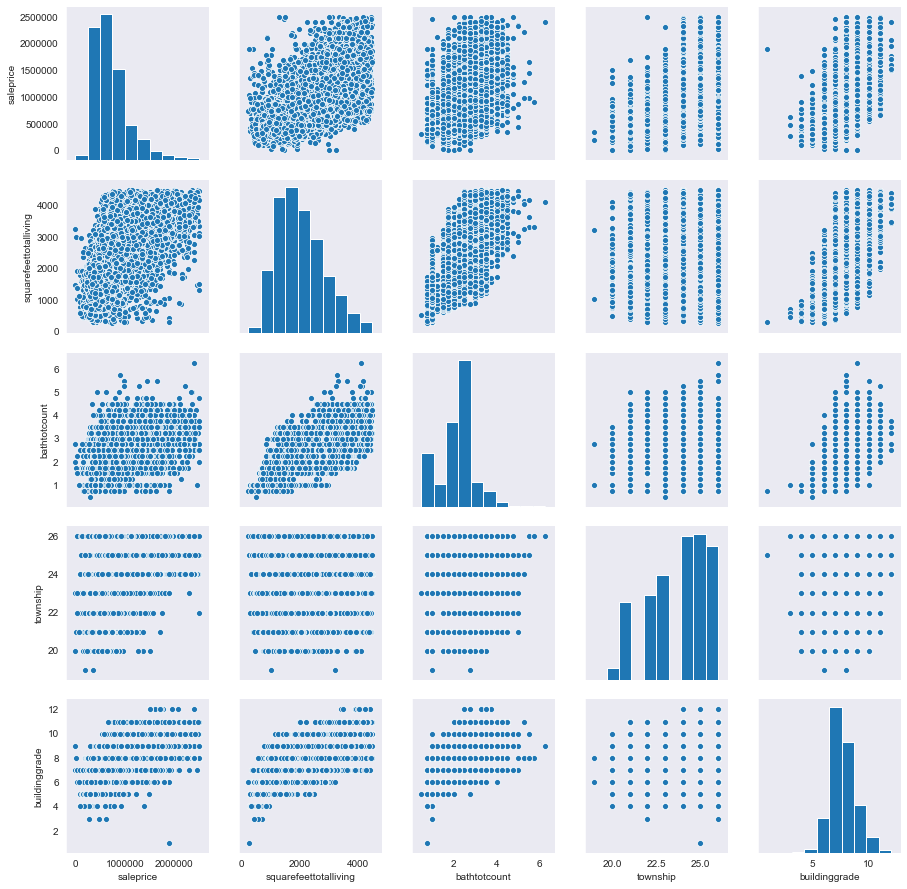

In [81]:
# create subsetted df with just interested features
high_correlation_df = df[['saleprice', 'squarefeettotalliving', 'bathtotcount', 'township', 'buildinggrade']]

sns.pairplot(high_correlation_df);

For our first modeling purposes, we will stick with modeling total square footage and total bathroom count and go from there.

# First Shitty Model

### First model `saleprice ~ squarefeettotalliving`:

In [82]:

# Create a dataframe with only the target and the chosen corellation feature
fsm_df = df[["squarefeettotalliving", "saleprice"]]

# build the R-style formula.
formula = "saleprice ~ squarefeettotalliving"

# Fit the model on the dataframe composed of the two features
fsm = ols(formula=formula, data=fsm_df).fit()

In [84]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                 1.004e+04
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:49:08   Log-Likelihood:            -2.5468e+05
No. Observations:               18170   AIC:                         5.094e+05
Df Residuals:                   18168   BIC:                         5.094e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.744e+05   5996.636     29.077      0.000    1.63e+05    1.86e+05
squarefeettotalliving   272.4847      2.719    100.218      0.000     267.155     277.814
==============================================================================
Omnibus:                     3783.473   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9607.369
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       5.736   Cond. No.                     6.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check assumptions:

#### Normality:

Text(0.5, 1.0, 'QQ-Plot of Residuals')

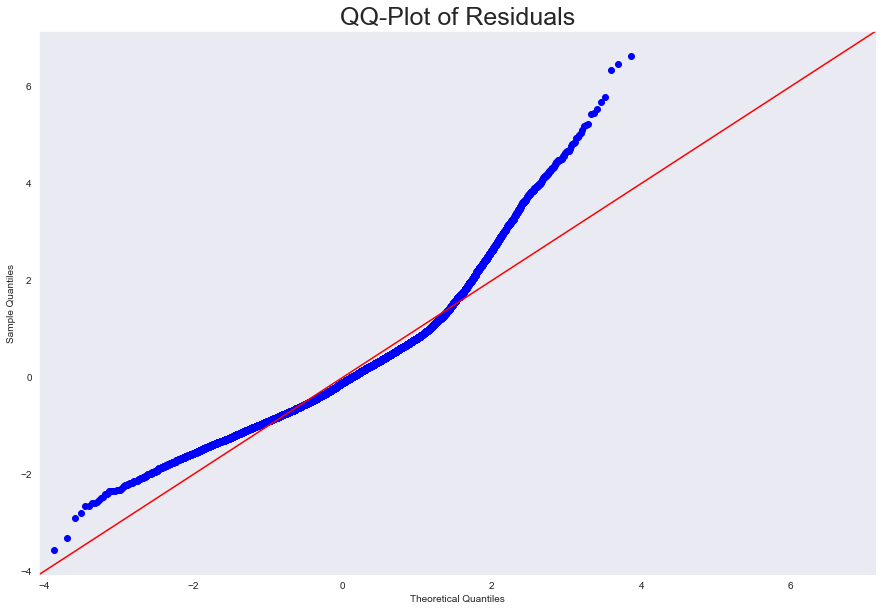

In [99]:
fig, ax = plt.subplots(figsize = (15, 10))
figure = sm.graphics.qqplot(fsm.resid, dist=stats.norm, line='45', fit=True, ax = ax);
ax.set_title('QQ-Plot of Residuals', fontsize = 25)

#### Homoscadasicity:

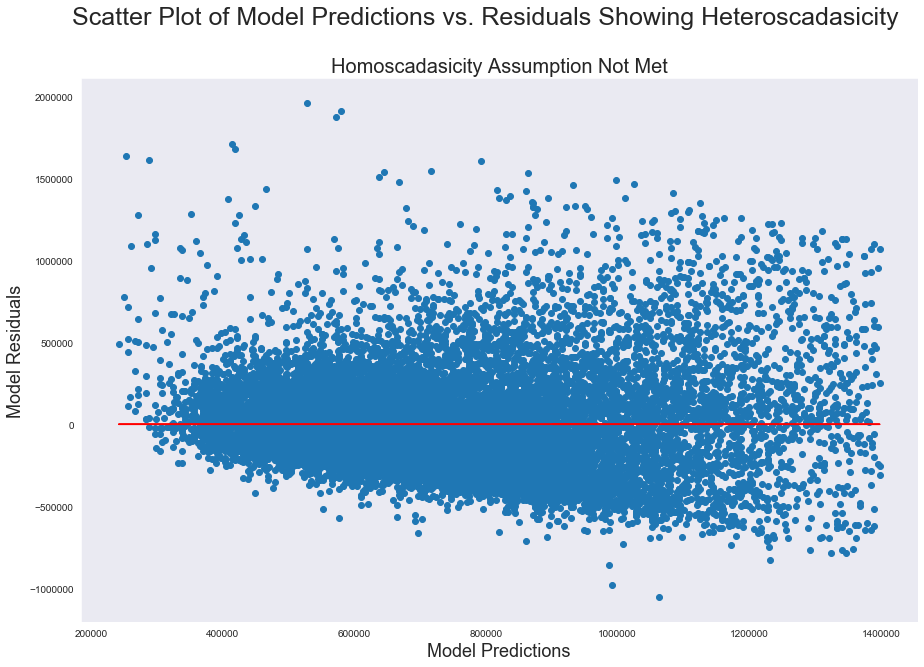

In [100]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.scatter(fsm.predict(), fsm.resid)
sns.set(font_scale = 1)
fig.suptitle('Scatter Plot of Model Predictions vs. Residuals Showing Heteroscadasicity', fontsize = 25)
ax.set_title('Homoscadasicity Assumption Not Met', fontsize = 20)
plt.xlabel('Model Predictions', fontsize = 18)
plt.ylabel('Model Residuals', fontsize = 18)
ax.tick_params(labelsize=10)
plt.plot(fsm.predict(), [0 for i in range(len(df))], color = 'red')

### First model `saleprice ~ bathtotcount`:

In [101]:

# Create a dataframe with only the target and the chosen corellation feature
fsm_df2 = df[["bathtotcount", "saleprice"]]

# build the R-style formula.
formula = "saleprice ~ bathtotcount"

# Fit the model on the dataframe composed of the two features
fsm2 = ols(formula=formula, data=fsm_df2).fit()

In [102]:
fsm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     4951.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:00:18   Log-Likelihood:            -2.5649e+05
No. Observations:               18170   AIC:                         5.130e+05
Df Residuals:                   18168   BIC:                         5.130e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.302e+05   7555.169     30.464      0.000    2.15e+05    2.45e+05
bathtotcount  2.334e+05   3316.550     70.361      0.000    2.27e+05     2.4e+05
==============================================================================
Omnibus:                     4331.897   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10707.901
Skew:                           1.314   Prob(JB):                         0.00
Kurtosis:                       5.690   Cond. No.                         8.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check assumptions:

#### Normality:

Text(0.5, 1.0, 'QQ-Plot of Residuals')

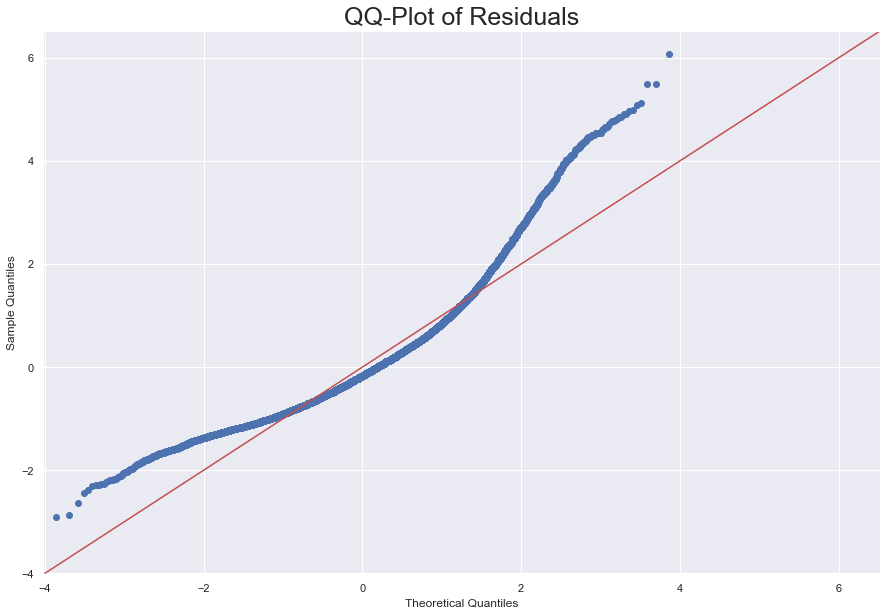

In [103]:
fig, ax = plt.subplots(figsize = (15, 10))
figure = sm.graphics.qqplot(fsm2.resid, dist=stats.norm, line='45', fit=True, ax = ax);
ax.set_title('QQ-Plot of Residuals', fontsize = 25)

#### Homoscadasicity:

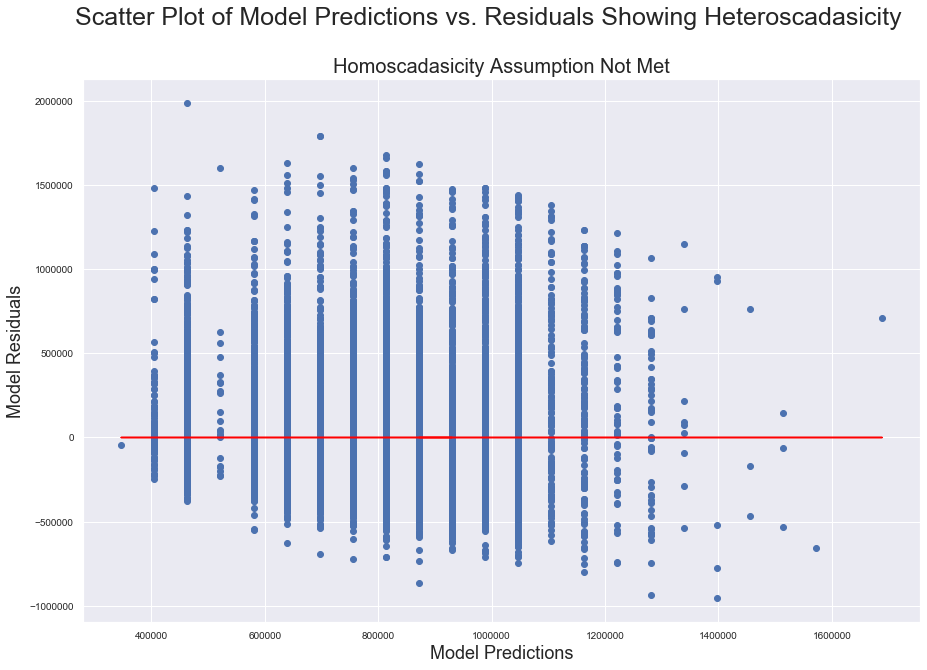

In [104]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.scatter(fsm2.predict(), fsm2.resid)
sns.set(font_scale = 1)
fig.suptitle('Scatter Plot of Model Predictions vs. Residuals Showing Heteroscadasicity', fontsize = 25)
ax.set_title('Homoscadasicity Assumption Not Met', fontsize = 20)
plt.xlabel('Model Predictions', fontsize = 18)
plt.ylabel('Model Residuals', fontsize = 18)
ax.tick_params(labelsize=10)
plt.plot(fsm2.predict(), [0 for i in range(len(df))], color = 'red')

## First Multicollinearity Model
### Model `saleprice ~ bathtotcount ~ squarefeettotliving`:

In [108]:
# Create a dataframe with only the target and the chosen corellation feature
fsm_df3 = df[["squarefeettotalliving", "bathtotcount", "saleprice"]]

# build the R-style formula.
formula = "saleprice ~ squarefeettotalliving + bathtotcount"

# Fit the model on the dataframe composed of the two features
fsm3 = ols(formula=formula, data=fsm_df3).fit()

# view r^2 and model summary:
fsm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     5038.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:05:42   Log-Likelihood:            -2.5467e+05
No. Observations:               18170   AIC:                         5.093e+05
Df Residuals:                   18167   BIC:                         5.094e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.586e+05   6928.044     22.888      0.000    1.45e+05    1.72e+05
squarefeettotalliving   258.6807      4.076     63.461      0.000     250.691     266.670
bathtotcount           2.045e+04   4501.032      4.543      0.000    1.16e+04    2.93e+04
==============================================================================
Omnibus:                     3790.954   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9606.041
Skew:                           1.144   Prob(JB):                         0.00
Kurtosis:                       5.730   Cond. No.                     7.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

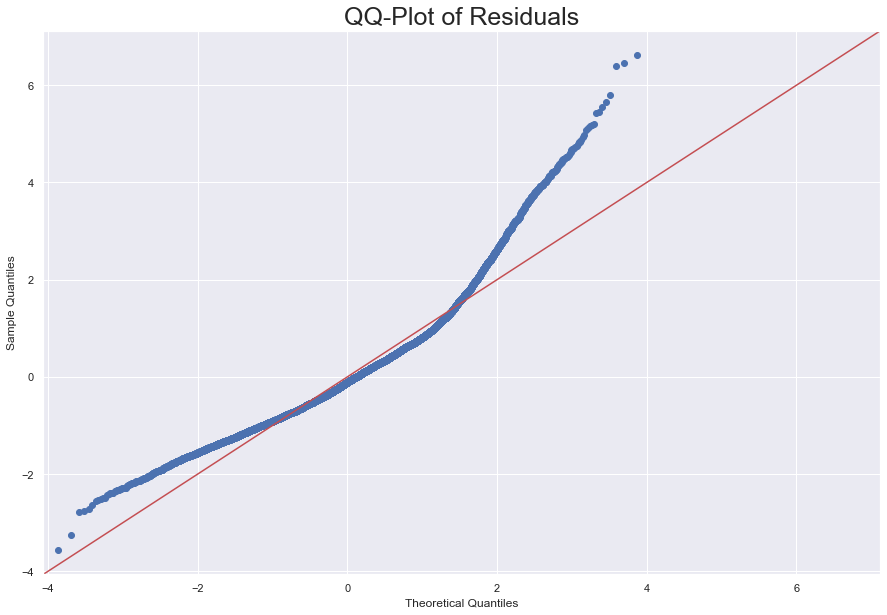

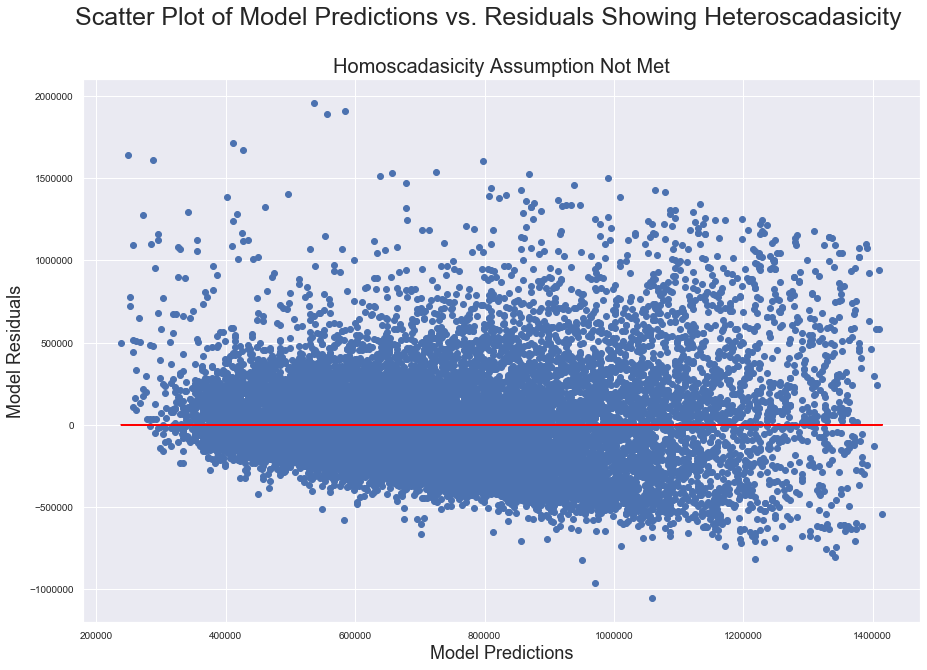

In [109]:
# plot normality assumption
fig, ax = plt.subplots(figsize = (15, 10))
figure = sm.graphics.qqplot(fsm3.resid, dist=stats.norm, line='45', fit=True, ax = ax);
ax.set_title('QQ-Plot of Residuals', fontsize = 25)

# plot homoscadasicity assumption
fig, ax = plt.subplots(figsize = (15, 10))
plt.scatter(fsm3.predict(), fsm3.resid)
sns.set(font_scale = 1)
fig.suptitle('Scatter Plot of Model Predictions vs. Residuals Showing Heteroscadasicity', fontsize = 25)
ax.set_title('Homoscadasicity Assumption Not Met', fontsize = 20)
plt.xlabel('Model Predictions', fontsize = 18)
plt.ylabel('Model Residuals', fontsize = 18)
ax.tick_params(labelsize=10)
plt.plot(fsm3.predict(), [0 for i in range(len(df))], color = 'red')

# Interpretations Summary

So, on their own, `squarefeet` had an R^2 value of 0.356 and the assumptions were loosely met.  `bathtotcount` showed less of a correlation with R^2 equal to 0.214.

However together, the features increased R^2 VERY slightly at 0.357 and the assumptions did appear to improve somewhat small. 

Next we might think about standardising saleprice and total square footage and potentially adding features. 

# Cleaned Data set at the end of this iteration:

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18170 entries, 0 to 18181
Data columns (total 65 columns):
documentdate                    18170 non-null datetime64[ns]
saleprice                       18170 non-null float64
propertytype                    18170 non-null int64
principaluse                    18170 non-null int64
saleinstrument                  18170 non-null int64
currentuseland                  18170 non-null object
historicproperty                18170 non-null object
salereason                      18170 non-null int64
propertyclass                   18170 non-null int64
zipcode                         15809 non-null float64
streettype                      18170 non-null object
stories                         18170 non-null float64
buildinggrade                   18170 non-null category
squarefeettotalliving           18170 non-null int64
squarefeettotalbasement         18170 non-null int64
squarefeetgarageattached        18170 non-null float64
squarefeetopenporch 

In [111]:
df.to_csv('../leana_m1')